In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import sys
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from keras import backend as K
K.set_image_dim_ordering('th')

train = pd.read_csv('train.csv')    # reading the csv file
print(train.head())

print(train.columns)

train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Images/'+train['Id'][i]+'.jpg',target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image) 

  0%|                                                                                         | 0/7254 [00:00<?, ?it/s]

          Id                                Genre  Action  Adventure  \
0  tt0086425                  ['Comedy', 'Drama']       0          0   
1  tt0085549        ['Drama', 'Romance', 'Music']       0          0   
2  tt0086465                           ['Comedy']       0          0   
3  tt0086567               ['Sci-Fi', 'Thriller']       0          0   
4  tt0086034  ['Action', 'Adventure', 'Thriller']       1          1   

   Animation  Biography  Comedy  Crime  Documentary  Drama  ...  N/A  News  \
0          0          0       1      0            0      1  ...    0     0   
1          0          0       0      0            0      1  ...    0     0   
2          0          0       1      0            0      0  ...    0     0   
3          0          0       0      0            0      0  ...    0     0   
4          0          0       0      0            0      0  ...    0     0   

   Reality-TV  Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
0           0        0     

100%|██████████████████████████████████████████████████████████████████████████████| 7254/7254 [02:51<00:00, 42.36it/s]


In [2]:
print(X.shape)

(7254, 3, 200, 200)


TypeError: Invalid shape (3, 200, 200) for image data

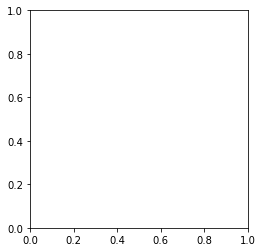

In [4]:
plt.imshow(X[2])
plt.show()

In [5]:
train['Genre'][2]

"['Comedy']"

In [6]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [10]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

ValueError: ('The specified size contains a dimension with value <= 0', (-2048, 128))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 196, 196, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 94, 94, 32)        12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 43, 43, 64)       

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Train on 6528 samples, validate on 726 samples
Epoch 1/10
6528/6528 [==============================] - 763s 117ms/step - loss: 0.3872 - accuracy: 0.8383 - val_loss: 0.2673 - val_accuracy: 0.9067
Epoch 2/10
6528/6528 [==============================] - 554s 85ms/step - loss: 0.2793 - accuracy: 0.9030 - val_loss: 0.2454 - val_accuracy: 0.9061
Epoch 3/10
6528/6528 [==============================] - 515s 79ms/step - loss: 0.2663 - accuracy: 0.9052 - val_loss: 0.2451 - val_accuracy: 0.9067
Epoch 4/10
6528/6528 [==============================] - 547s 84ms/step - loss: 0.2604 - accuracy: 0.9059 - val_loss: 0.2420 - val_accuracy: 0.9067
Epoch 5/10
6528/6528 [==============================] - 525s 80ms/step - loss: 0.2564 - accuracy: 0.9062 - val_loss: 0.2423 - val_accuracy: 0.9061
Epoch 6/10
6528/6528 [==============================] - 539s 83ms/step - loss: 0.2545 - accuracy: 0.9070 - val_loss: 0.2461 - val_accuracy: 0.9067
Epoch 7/10
6528/6528 [==============================] - 583s 89ms/step

In [22]:
img = image.load_img('GOT.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

Drama (0.486)
Action (0.274)
Thriller (0.219)


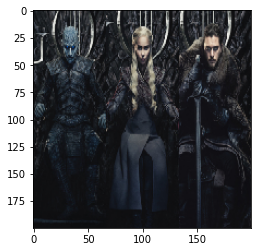

In [23]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [24]:
img = image.load_img('avengers.jpeg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

Drama (0.487)
Action (0.26)
Comedy (0.228)


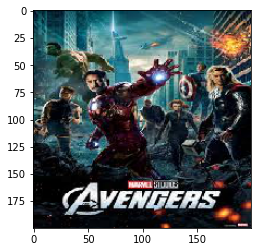

In [25]:

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [26]:
img = image.load_img('golmal.jpeg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

Drama (0.492)
Comedy (0.353)
Action (0.217)


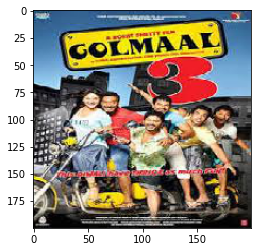

In [27]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [29]:
img = image.load_img('malamaal weekly.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

Drama (0.496)
Comedy (0.479)
Romance (0.235)


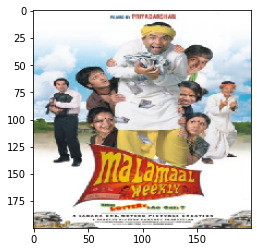

In [30]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)